In [1]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [2]:
etopodata = Dataset('etopo5.cdf')
etopodata.variables.keys()
etopo_x = etopodata.variables['ETOPO05_X'][:]
etopo_y = etopodata.variables['ETOPO05_Y'][:]
etopo_rose = etopodata.variables['ROSE'][:]

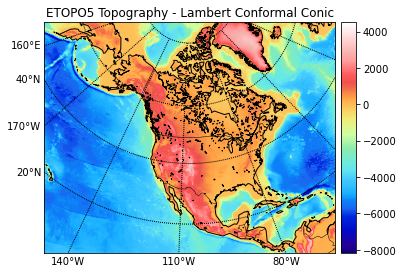

In [3]:
etopo_rose, etopo_x = shiftgrid(180.,etopo_rose, etopo_x,start=False)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352, 
            rsphere=(6378137.00,6356752.3142), resolution='c', area_thresh=0.5,
            projection='lcc', lat_1=50., lon_0=-107., ax=ax)

nx = int((m.xmax-m.xmin)/5000.)+1
ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(etopo_rose, etopo_x, etopo_y, nx, ny)

im = m.imshow(topodat,cm.GMT_haxby)
m.drawcoastlines()
m.drawcountries()

parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])

cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


warp to orthographic map ...


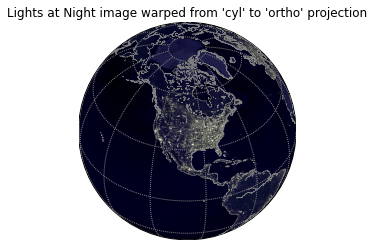

In [4]:
fig=plt.figure()
m = Basemap(projection='ortho',lat_0=40,lon_0=-100,resolution='l')
m.warpimage(image='earth_lights_lrg.jpg')
m.drawcoastlines(linewidth=0.5,color='0.5')
m.drawmeridians(np.arange(0,360,30),color='0.5')
m.drawparallels(np.arange(-90,90,30),color='0.5')
plt.title("Lights at Night image warped from 'cyl' to 'ortho' projection",fontsize=12)
print('warp to orthographic map ...')
plt.show()

plot native cylindrical map (no warping needed) ...


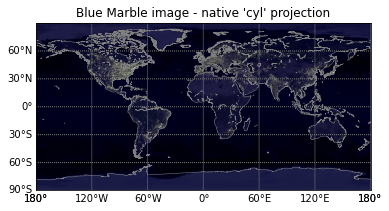

In [5]:
fig1=plt.figure()
m1 = Basemap(projection='cyl', llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90, resolution='l')
im = m1.bluemarble(scale=0.5)
m1.warpimage(image='earth_lights_lrg.jpg')

m1.drawcoastlines(linewidth=0.5,color='0.5')

m1.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m1.drawparallels(np.arange(-90,90,30), labels=[1,0,0,1], color='0.5')

plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')

plt.show()